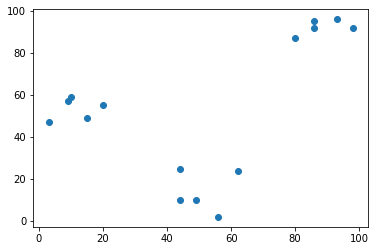

In [2]:
import matplotlib.pyplot as plt

x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

plt.scatter(x_coordinates, y_coordinates)


1. Hierarchical clustering

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
                 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
                 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                   'y_coordinate': y_coordinates})


<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

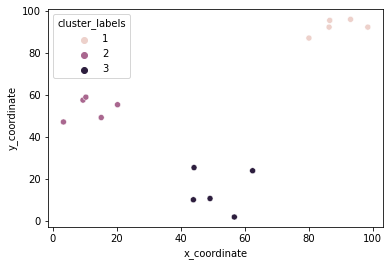

In [4]:
# 1.1. Compute distance between intermediate clusters
Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

# 1.2. Plot the points
sns.scatterplot(x='x_coordinate', y='y_coordinate',
                hue='cluster_labels', data=df)

2. K-Means clustering

In [5]:
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import random
random.seed((1000, 2000))

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
                 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
                 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                   'y_coordinate': y_coordinates})

C:\Users\TheAncientOwl\AppData\Local\Temp\ipykernel_9096\2245726450.py:7: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed((1000, 2000))


<AxesSubplot:xlabel='x_coordinate', ylabel='y_coordinate'>

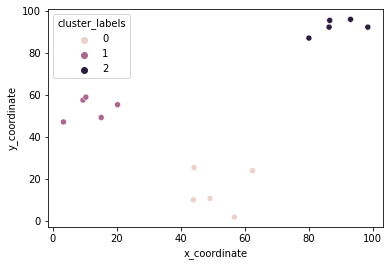

In [6]:
centroids, _ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

sns.scatterplot(x='x_coordinate', y='y_coordinate',
                hue='cluster_labels', data=df)


K-Means 2.0.

In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [8]:
features, true_labels = make_blobs(
  n_samples=200,
  centers=3,
  cluster_std=2.75,
  random_state=42
)


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [10]:
kmeans = KMeans(
  init='random',
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

kmeans.fit(scaled_features)


KMeans(init='random', n_clusters=3, random_state=42)

In [11]:
kmeans.inertia_


74.57960106819854

In [12]:
kmeans.cluster_centers_


array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [13]:
kmeans.n_iter_


2

In [14]:
print(kmeans.labels_[:5])

print(true_labels[:5])


[2 0 1 1 1]
[1 0 2 2 2]


Choosing the appropiate number of clusters


Elbow method

c:\Users\TheAncientOwl\anaconda3\envs\mango-backend\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


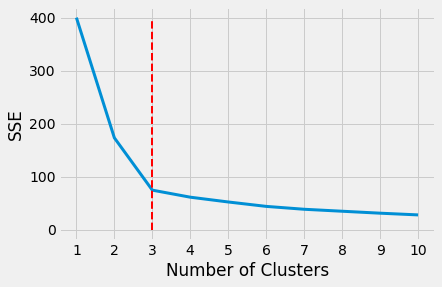

In [17]:
kmeans_kwargs = {
  'init': 'random',
  'n_init': 10,
  'max_iter': 300,
  'random_state': 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse, linewidth=3)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

k1 = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')

k1.elbow
plt.vlines(x=k1.elbow, ymin=0, ymax=max(sse), colors='red', linewidth=2.0, linestyles='dashed')



Silhouette coefficient

Text(0, 0.5, 'Silhouette Coefficient')

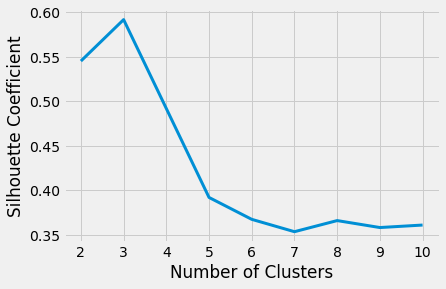

In [21]:
silhouette_coefficients  = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, linewidth=3)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")


Hierarchycal clustering 2.0

In [22]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


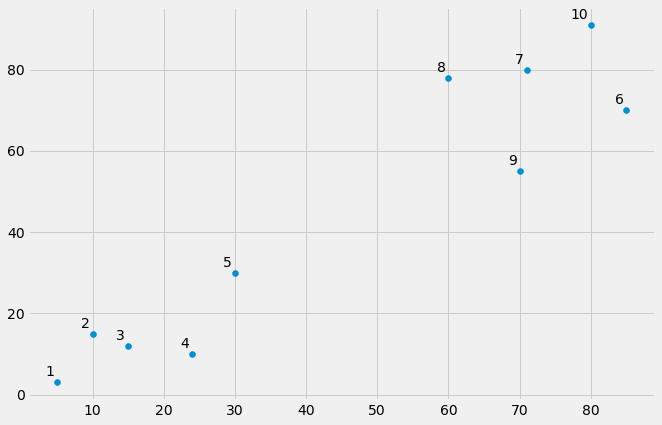

In [23]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:, 0], X[:, 1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [60.0, 60.0, 75.0, 75.0],
  [67.5, 67.5, 85.0, 85.0],
  [76.25, 76.25, 95.0, 95.0],
  [35.625, 35.625, 85.625, 85.625]],
 'dcoord': [[0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [11.180339887498949, 14.212670403551895, 14.212670403551895, 0.0],
  [14.212670403551895, 17.204650534085253, 17.204650534085253, 0.0],
  [17.204650534085253, 21.213203435596427, 21.213203435596427, 0.0],
  [0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [5.830951894845301, 9.219544457292887, 9.219544457292887, 0.0],
  [9.219544457292887, 13.0, 13.0, 0.0],
  [13.0, 20.8806130178211, 20.8806130178211, 0.0],
  [21.213203435596427,
   47.16990566028302,
   47.16990566028302,
   20.8806130178211]],
 'ivl': [8, 7, 10, 6, 9, 3, 2, 4, 1, 5],
 'leaves': [7, 6, 9, 5, 8, 2, 1, 3, 0, 4],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C0'],
 '

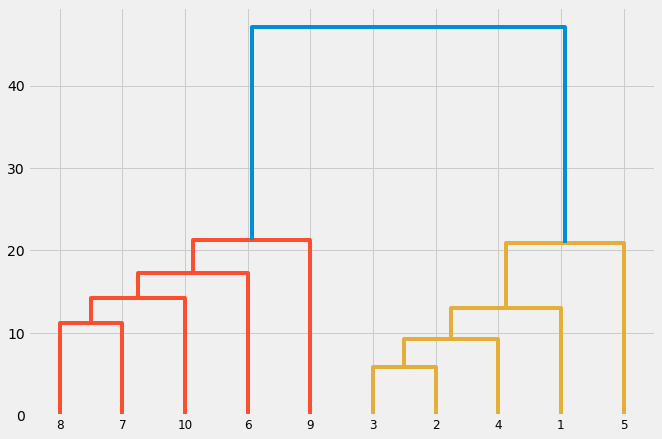

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, 'single')

labellist = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labellist,
           distance_sort='descending',
           show_leaf_counts=True)


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

print(cluster.labels_)


[1 1 1 1 1 0 0 0 0 0]


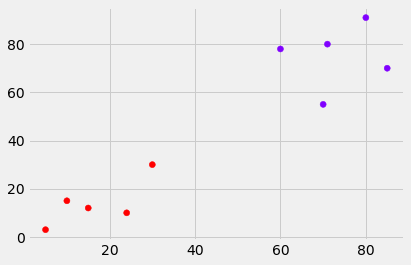

In [27]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

customer_data = pd.read_csv('C:\\Users\\TheAncientOwl\\Code\\data-analysis-tool\\server\\common\\test-data\\hierarchical-clustering.shopping-data.csv')
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data = customer_data.iloc[:, 3:5].values


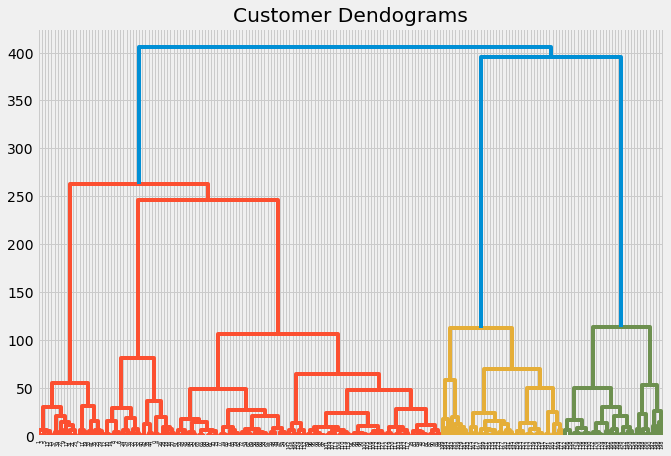

In [34]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))


In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(data)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

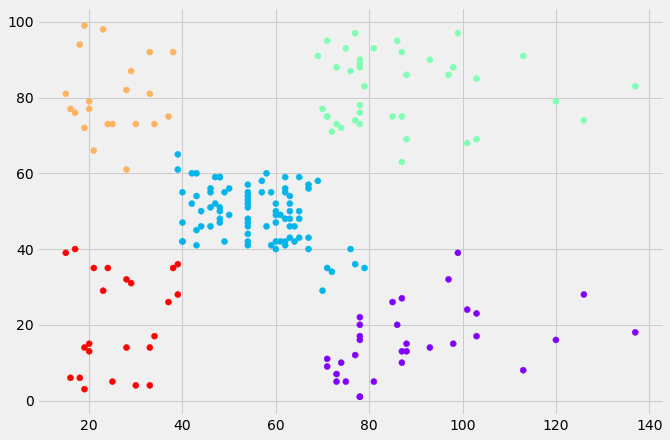

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
